In [17]:
import numpy as np
import math as mt
from matplotlib import pyplot as plt
import scipy.linalg as sln
plt.ioff()

In [18]:
def f(x):
    return np.sin(np.pi*x)

In [10]:
a = -2
b = 2

space = b-a

In [11]:
def shl(nen, nint):
    point = []
    weight = []
    sh = np.zeros((int(nen), int(nint)))
    if(nint == 2):
        point.append(-mt.sqrt(3.0)/3.0)
        point.append(mt.sqrt(3.0)/3.0)
        weight.append(1)
        weight.append(1)
    for l in range(0, int(nint)):
        t = point[l]
        if(nen == 2):
            sh[0][l] = (1.0 - t)/2.0
            sh[1][l] = (1.0 + t)/2.0
            
    return sh

In [12]:
def we(nint):
    w = []
    if(nint == 2):
        w.append(1)
        w.append(1)
    return w

In [13]:
k = 1
error = []
nell = []
for i in range(2, 8):
    nel = mt.pow(4, i)
    
    h = space/nel
    nell.append(h)
    X = np.arange(a, b+h, h)
    nen, nint = (k+1), (k+1)
    # print("nel = {}, h = {}, nen = {}, nint = {}".format(nel, h, nen, nint))
    
    M = np.zeros((len(X), len(X)))
    F = np.zeros((len(X)))
    
    for n in range(0, int(nel)):
        # print("For nel = {}...".format(nel))
        Me = np.zeros((int(nen), int(nen)))
        Fe = np.zeros((int(nen)))
        shg = shl(int(nen), int(nint))
        w = we(int(nint))
        for l in range(0, int(nint)):
            xx = 0
            for j in range(0, int(nen)):
                # print("shg(j, l) = {}".format(shg[j][l]))
                # print("X(n+j-1) = {}".format(X[n+j-1]))
                xx += shg[j][l]*X[n+j-1]
            for k in range(0, int(nen)):
                Fe[k] += f(xx)*shg[k][l]*w[l]*(h/2)
                for r in range(0, int(nen)):
                    Me[r, k] += shg[r][l]*shg[k][l]*w[l]*(h/2)
        for j in range(0, int(nen)):
            F[n+j-1] += Fe[j]
            for k in range(0, int(nen)):
               M[n+k-1][n+j-1] += Me[k][j]
    alpha = sln.solve(M, F)
    plt.figure(figsize=(18, 10))
    plt.plot(X, alpha, 'g--', label='Projeção L2')
    XX = np.arange(a, b+0.0001, 0.0001)
    plt.plot(XX, f(XX), label='Exata')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    title = 'Comparação solução exata com projeção L2 para {} elementos com {} pontos de integração e h {}'.format(nel, nint, h)
    file_to_save = 'nel_{}_nint_{}_h_{}.png'.format(nel, nint, h)
    plt.title(title)
    plt.savefig(file_to_save)
    
    erul2 = 0
    
    for n in range(0, int(nel)):
        eru = 0
        shg = shl(int(nen), int(nint))
        w = we(int(nint))
        for l in range(0, int(nint)):
            uh = 0.0
            xx = 0.0
            for k in range(0, int(nen)):
                uh += shg[k][l]*alpha[n+k-1]
                xx += shg[k][l]*X[n+k-1]
            eru += ((f(xx)-uh)**2)*w[l]*(h/2)
        erul2 += eru
    erul2 = mt.sqrt(erul2)
    error.append(erul2)

In [14]:
slope, intercept = np.polyfit(nell, error, 1)
print("Slope:", str(slope))

error = error[::-1]
error = np.array(error)
nell = np.array(nell)
plt.figure(figsize=(18, 10))
plt.loglog(nell, error)
plt.xlabel('nel')
plt.ylabel('erro')
title = 'Erro em função do espaçamento'
file_to_save = 'error_linear.png'
plt.title(title)
plt.legend()
plt.savefig(file_to_save)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Slope: 0.5374979925610285


In [14]:
print(mt.sin(PI))

NameError: name 'PI' is not defined

In [44]:
values_x = []
values_alpha = []

with open('/home/joao-oliveira/Documents/Repositories/Finite-Elements-Method-219016/julia/homework1/resultados_xl.dat', 'r') as file:
    for line in file:
        value = float(line.strip())
        values_x.append(value)

with open('/home/joao-oliveira/Documents/Repositories/Finite-Elements-Method-219016/julia/homework1/resultados_alphas.dat', 'r') as file:
    for line in file:
        value = float(line.strip())
        values_alpha.append(value)

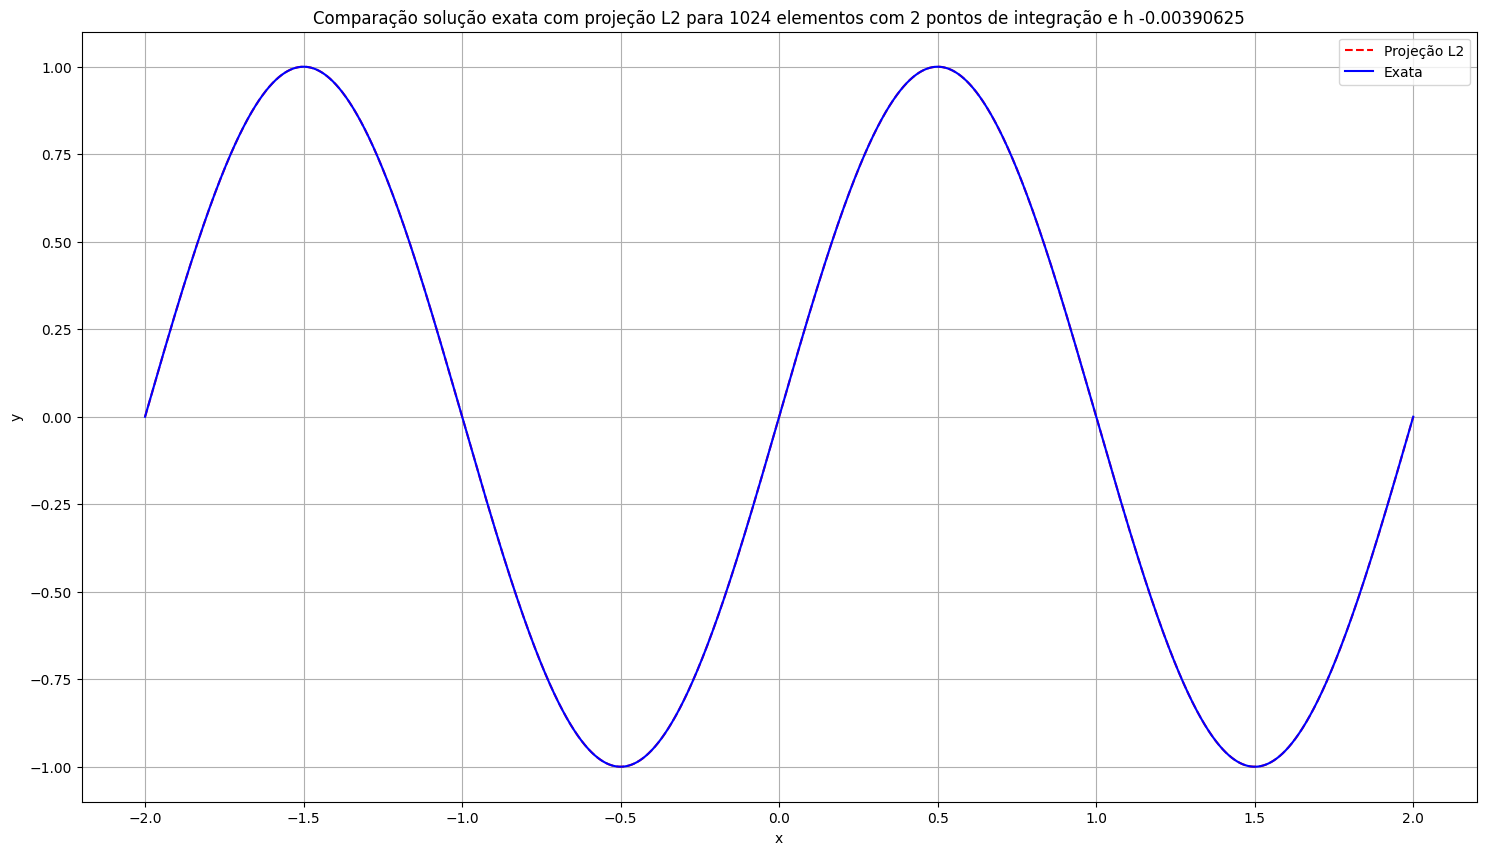

In [45]:
plt.figure(figsize=(18, 10))
plt.plot(values_x, values_alpha, 'r--', label='Projeção L2')
XX = np.arange(-2, 2+0.0001, 0.0001)
plt.plot(XX, f(XX), 'b', label='Exata')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
title = 'Comparação solução exata com projeção L2 para {} elementos com {} pontos de integração e h {}'.format(1024, 2, (-2-2)/(1024))
file_to_save = 'nel_{}_nint_{}_h_{}.png'.format(1024, 2, (-2-2)/(1024))
plt.title(title)
plt.savefig(file_to_save)
plt.show()